In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis.resonator import plot_resonator

In [3]:
npd = npy.NumpyDirectory('/data/detectors/2017-02-15_112529_test.npd/')

In [4]:
npd.node_names()

['SingleSweep0', 'SingleSweepStream1', 'ADCSnap2']

In [5]:
sweep = npd.SingleSweep0
sss = npd.SingleSweepStream1

In [9]:
sss.sweep = sss.sweep[0]

In [10]:
sss.stream.tone_offset_frequency()

array([ 0.])

In [26]:
Q = sweep.resonator.Q
dQ = sweep.resonator.Q_error
L = 1 / Q
dL = dQ / Q**2
Qc = sweep.resonator.Q_e_real
dQc = sweep.resonator.Q_e_real_error
Lc = 1 / Qc
dLc = dQc / Qc**2

In [27]:
dLc

2.2147508863626448e-08

In [28]:
dL

1.0068309528844033e-07

In [19]:
sweep.resonator.Q_error / sweep.resonator.Q

0.0035938199837031821

In [20]:
sweep.resonator.Q_e_real_error / sweep.resonator.Q_e_real

0.0021923750654138422

In [18]:
sweep.resonator.f_0_error / sweep.resonator.f_0

5.9272338761231042e-08

In [21]:
sss.resonator.Q_error / sss.resonator.Q

0.00097042637352057638

In [22]:
sss.resonator.f_0_error / sss.resonator.f_0

1.5575352624998383e-08

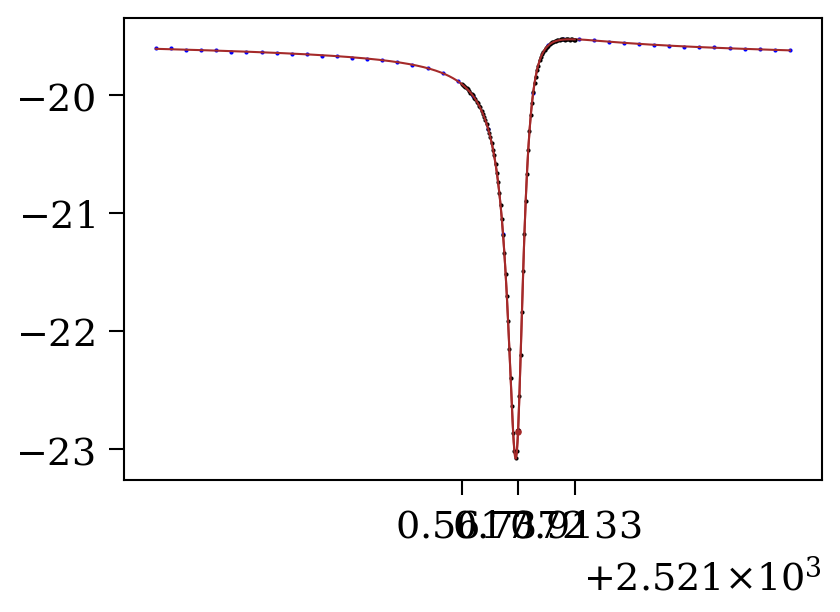

In [11]:
fig, ax = plt.subplots()
plot_resonator.amplitude(ax, sweep.resonator)
plot_resonator.amplitude(ax, sss.resonator, data_color='black')

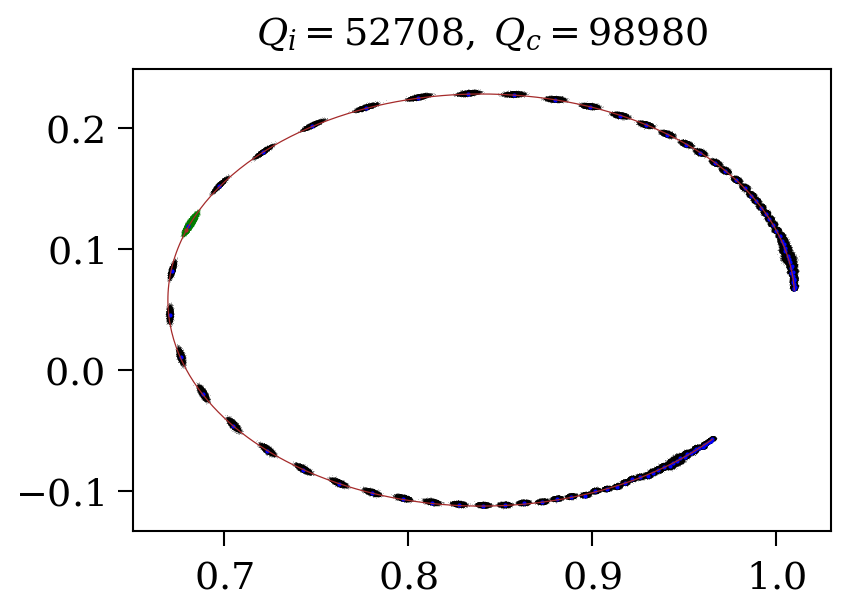

In [12]:
fix, ax = plt.subplots()
plot_basic.sss_complex_plane(sss, ax)
ax.set_title(r'$Q_i = {:.0f}, \; Q_c = {:.0f}$'.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

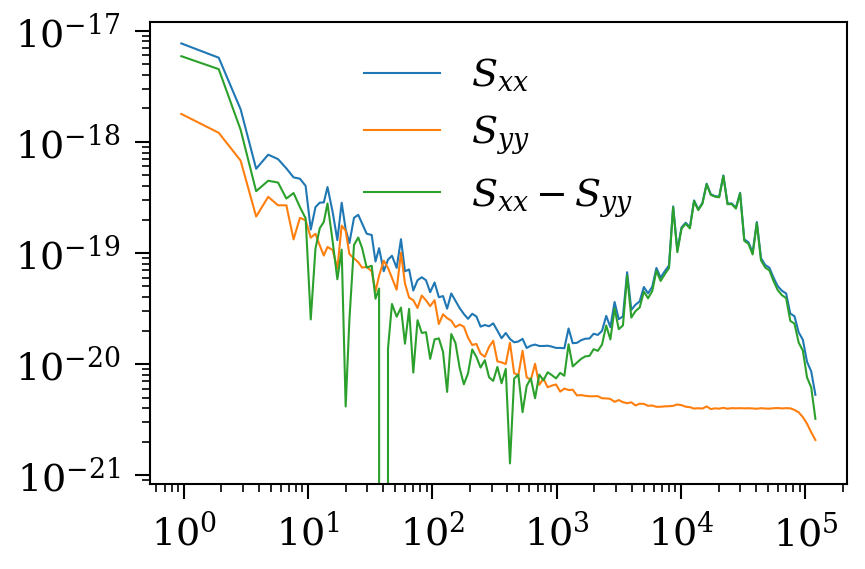

In [13]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(sss.S_frequency, sss.S_xx, label='$S_{xx}$')
ax.plot(sss.S_frequency, sss.S_yy, label='$S_{yy}$')
ax.plot(sss.S_frequency, sss.S_xx - sss.S_yy, label='$S_{xx} - S_{yy}$')
ax.legend();